# Домашнее задание по теме "Функции потерь и оптимизация"

- Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
- Реализовать самостоятельно логистическую регрессию
- Обучить ее методом градиентного спуска
- Методом nesterov momentum
- Методом rmsprop

Дополнительное задание *
- В качестве dataset’а взять Iris, оставив 2 класса:
- Iris Versicolor
- Iris Virginica

In [3]:
# достанем встроенный датасет с ирисами из библиотеки sklearn 
from sklearn import datasets

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error, r2_score # подгружаем метрику mse и r2

In [5]:
#заружаем данные по ирисам
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [6]:
# поглядим на наш датасет
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
# занесем данные из датасета в таблицу при помощи pandas для удобной работы
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [8]:
data['target'] = iris.target

In [9]:
data = data[51:150]

In [10]:
# теперь 0 это 'versicolor', а 1 это 'virginica'
data.loc[0:99,'target']=0
data.loc[100:149,'target']=1

In [11]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


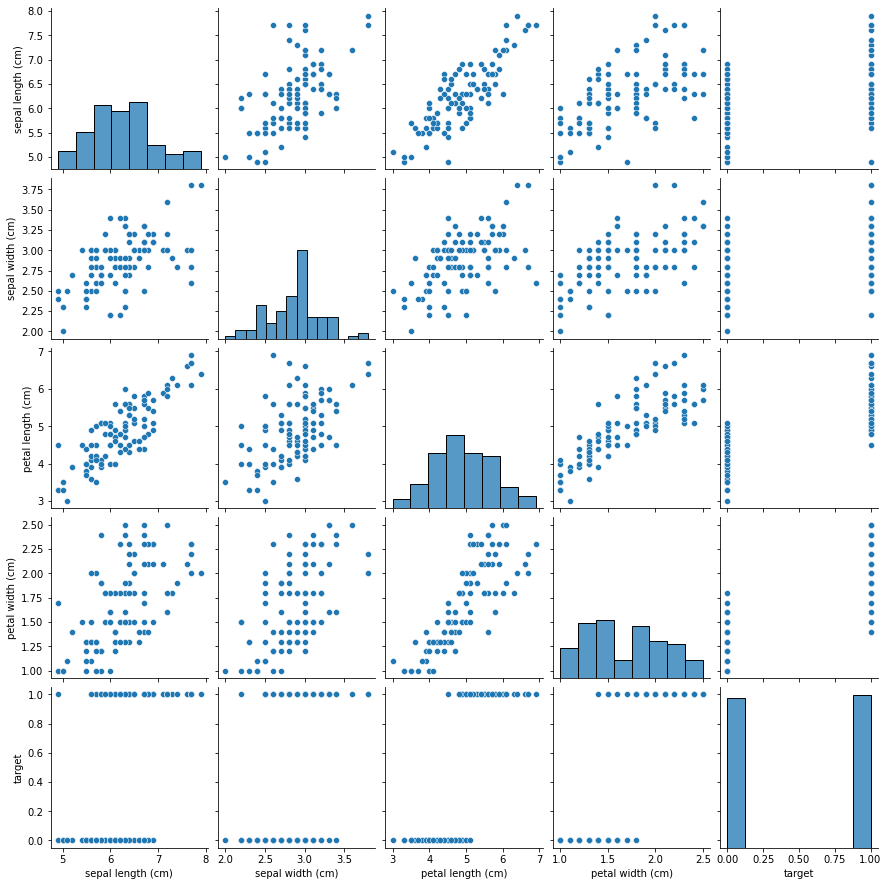

In [12]:
sns.pairplot(data)

In [13]:
X = data.iloc[:, :4]
Y = data.iloc[:, 4]

In [14]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X.iloc[:,2]

51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 99, dtype: float64

In [16]:
X.iloc[:,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
X.iloc[:,0]

51     6.4
52     6.9
53     5.5
54     6.5
55     5.7
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 99, dtype: float64

In [18]:
Y

51     0
52     0
53     0
54     0
55     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 99, dtype: int32

### Обучение методом градиентного спуска

In [19]:
# h(xi) = 1 / (1 + exp(params[0] + params[1] * xi + params[2] * xi + params[3] * xi + params[4] * xi))

EPOCHS = 6000
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(5,))
print(params)

for _ in range(EPOCHS):
    predictions = 1 / (1 + np.exp(-(params[0] + params[1] * X.iloc[:,0] + params[2] * X.iloc[:,1] + params[3] * X.iloc[:,2]  + params[4] * X.iloc[:,3])))
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X.iloc[:,0]) / len(predictions) 
    params[2] -= LEARNING_RATE * np.sum((predictions - Y) * X.iloc[:,1]) / len(predictions)
    params[3] -= LEARNING_RATE * np.sum((predictions - Y) * X.iloc[:,2]) / len(predictions)
    params[4] -= LEARNING_RATE * np.sum((predictions - Y) * X.iloc[:,3]) / len(predictions)

[ 0.08486492 -0.66211452 -1.95548736 -1.33345407  0.91513876]


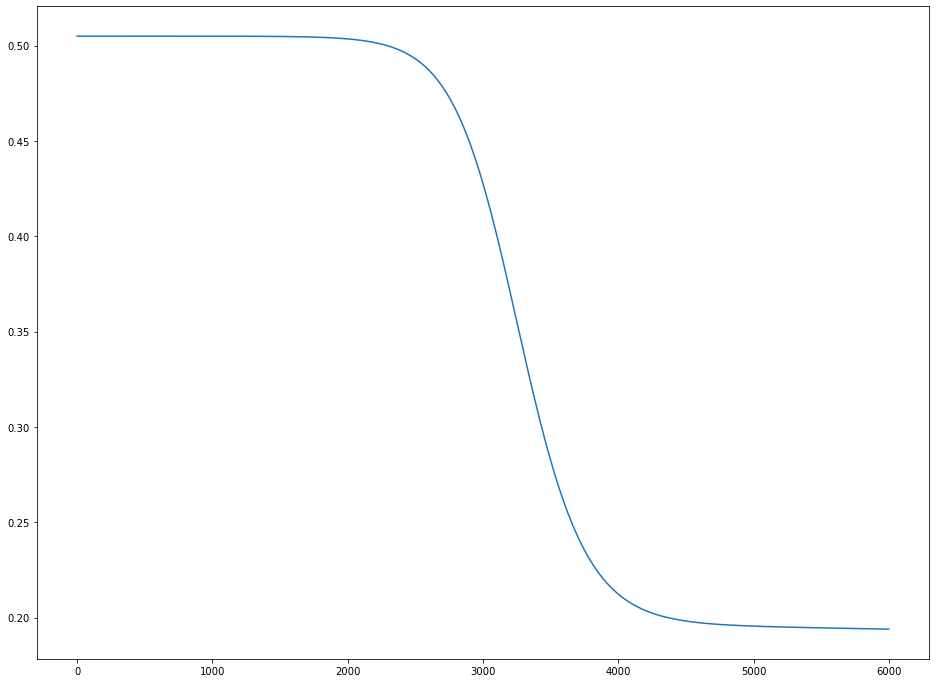

In [20]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

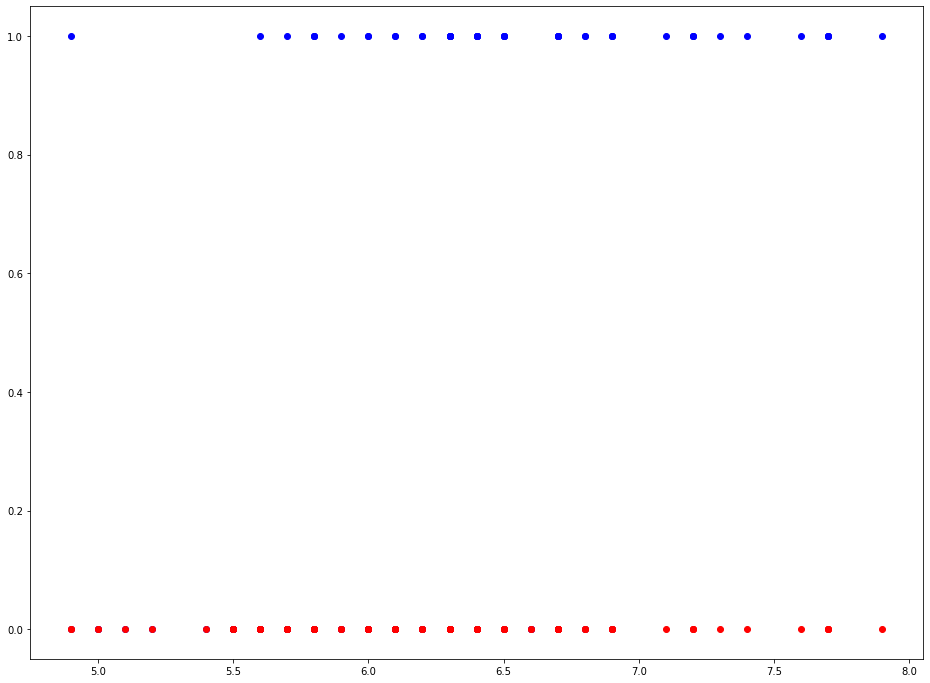

In [21]:
plt.figure(figsize=(16,12))
plt.scatter(X.iloc[:,0], Y, color='blue')
plt.scatter(X.iloc[:,0], preds[10], color='red')
plt.show()

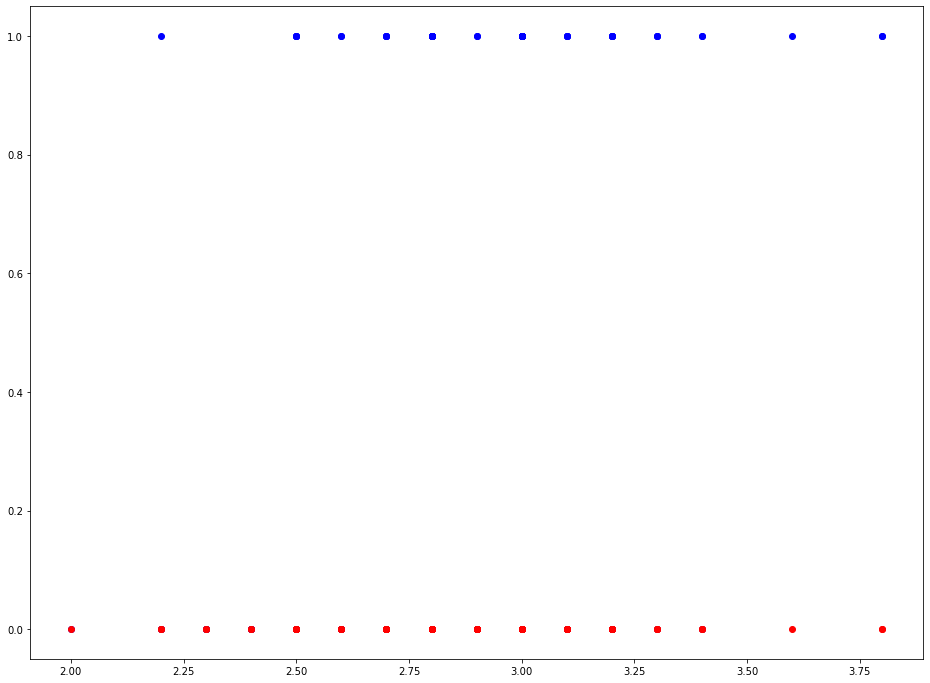

In [22]:
plt.figure(figsize=(16,12))
plt.scatter(X.iloc[:,1], Y, color='blue')
plt.scatter(X.iloc[:,1], preds[10], color='red')
plt.show()

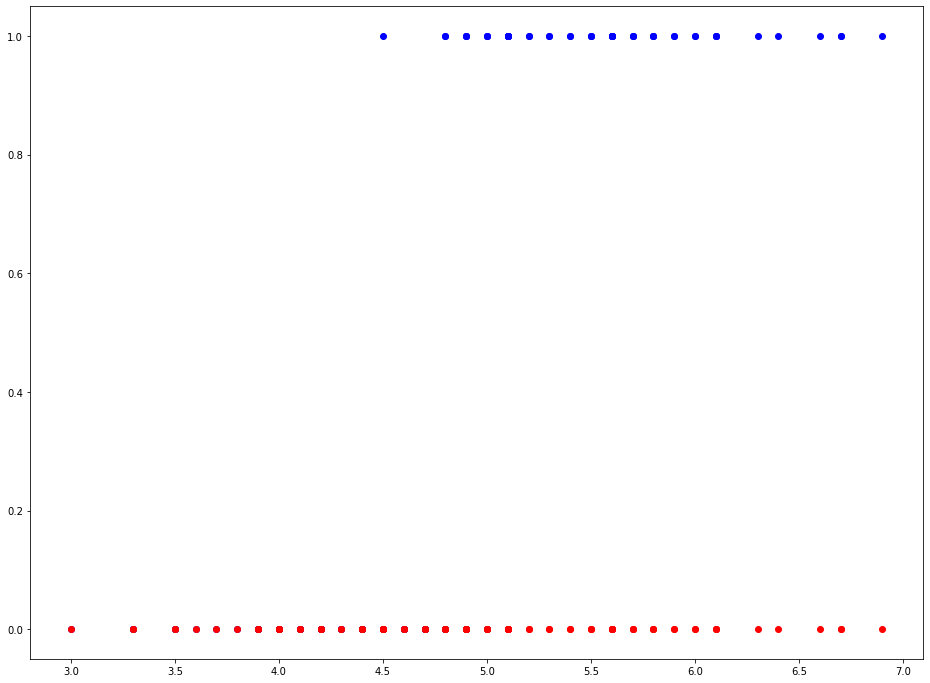

In [23]:
plt.figure(figsize=(16,12))
plt.scatter(X.iloc[:,2], Y, color='blue')
plt.scatter(X.iloc[:,2], preds[10], color='red')
plt.show()

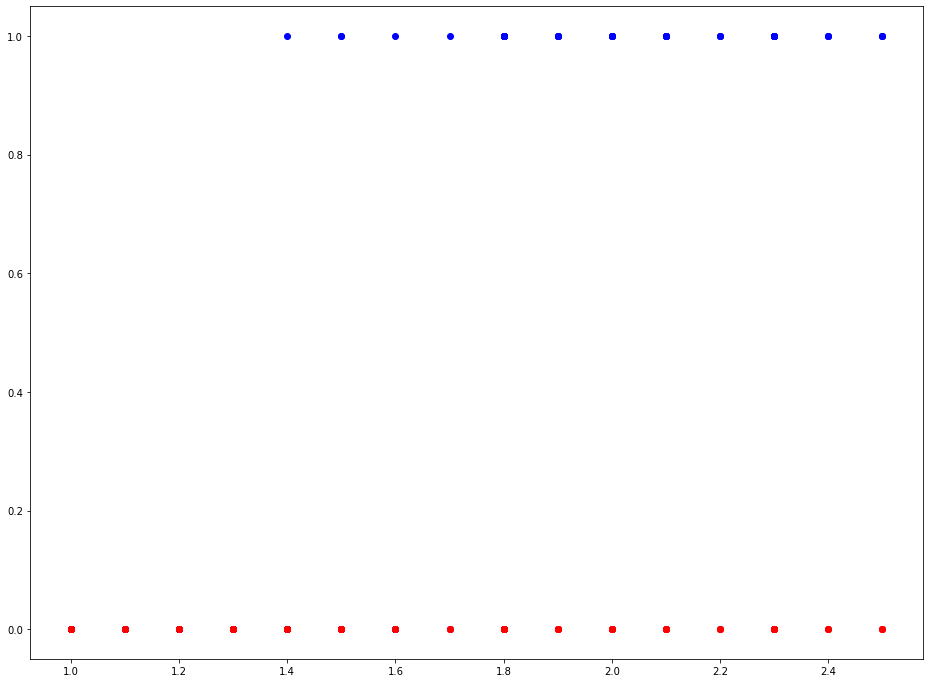

In [24]:
plt.figure(figsize=(16,12))
plt.scatter(X.iloc[:,3], Y, color='blue')
plt.scatter(X.iloc[:,3], preds[10], color='red')
plt.show()

In [25]:
params

array([ 0.25852853,  0.51832364, -1.42240213, -0.29622875,  1.30527585])

### Оценка качества модели градиентного спуска

In [232]:
roc_auc_score( Y, preds[5500] )


0.8681632653061224

In [233]:
# площадь под кривой
average_precision_score( Y, preds[5500] )


0.848187177994596

In [234]:
# считаем метрику MSE и R2
rmse = np.sqrt(mean_squared_error(Y, preds[5500]))
rmse

0.4411101097306261

In [235]:
r2 = r2_score(Y, preds[5500])
r2

0.2216080647292883

### Обучение  методом nesterov momentum

In [26]:
EPOCHS_2 = 1000
gamma_2 = 0.975
na_2 = 0.001

costs_2 = []
params_2 = []
params_U_2 = []
preds_2 = []

params_2 = np.random.normal(size=(5,))
params_U_2 = np.random.normal(size=(5,))


for _ in range(EPOCHS_2):
    predictions_2 = 1 / (1 + np.exp(-(params[0] - gamma_2 * params_U_2[0] + (params[1] - gamma_2 * params_U_2[1]) * X.iloc[:,0]  + (params[2] - gamma_2 * params_U_2[2]) * X.iloc[:,1] + (params[3] - gamma_2 * params_U_2[3])* X.iloc[:,2]  + (params[4] - gamma_2 * params_U_2[4]) * X.iloc[:,3])))
    preds_2.append(predictions_2)

    cost_2 = np.sum(np.square(predictions_2 - Y)) / (len(predictions))
    costs_2.append(cost_2)
    
    params_U_2[0] = gamma_2 * params_U_2[0] + na_2 * np.sum(predictions_2 - Y) / len(predictions_2)
    params_U_2[1] = gamma_2 * params_U_2[1] + na_2 * np.sum((predictions_2 - Y) * X.iloc[:,0]) / len(predictions_2) 
    params_U_2[2] = gamma_2 * params_U_2[2] + na_2 * np.sum((predictions_2 - Y) * X.iloc[:,1]) / len(predictions_2)
    params_U_2[3] = gamma_2 * params_U_2[3] + na_2 * np.sum((predictions_2 - Y) * X.iloc[:,2]) / len(predictions_2)
    params_U_2[4] = gamma_2 * params_U_2[4] + na_2 * np.sum((predictions_2 - Y) * X.iloc[:,3]) / len(predictions_2)
    
    params_2[0] -=  params_U_2[0]
    params_2[1] -=  params_U_2[1] 
    params_2[2] -=  params_U_2[2]
    params_2[3] -=  params_U_2[3]
    params_2[4] -=  params_U_2[4]

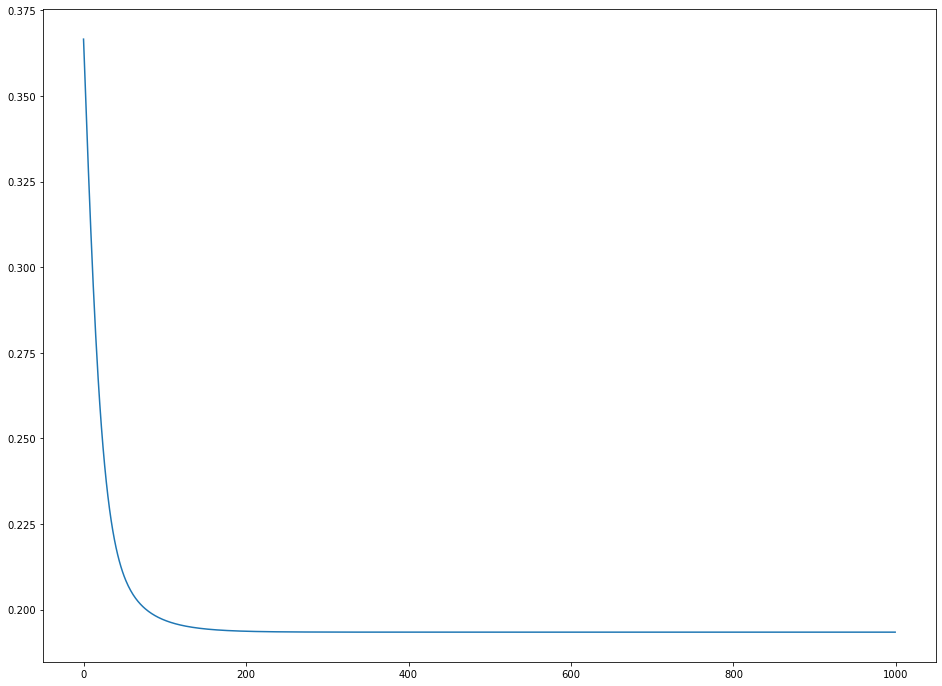

In [27]:
plt.figure(figsize=(16,12))
plt.plot(costs_2)
plt.show()

In [158]:
params_2

array([-50.82073042,  -5.83856561,  61.83413079,   0.60460529,
       -25.90686611])

In [159]:
params_U_2

array([ 0.00131538,  0.00282055,  0.00136086, -0.00458221, -0.00363457])

### Оценка качества модели nesterov momentum


In [281]:
roc_auc_score( Y, preds_2[999] )

0.8755102040816326

In [282]:
# площадь под кривой
average_precision_score( Y, preds_2[999] )


0.8574145860402841

In [283]:
# считаем метрику MSE и R2
rmse = np.sqrt(mean_squared_error(Y, preds_2[999]))
rmse

0.4397557430813947

In [284]:
r2 = r2_score(Y, preds_2[999])
r2

0.22638061300830403

### Обучение методом rmsprop

In [269]:
EPOCHS_3 = 500
na_3 = 0.01
gamma_3 = 0.9
e = 10e-6

costs_3 = []
params_3 = []
preds_3 = []

params_3 = np.random.normal(size=(5,))
E = np.random.normal(size=(5,))

for _ in range(EPOCHS_3):
    predictions_3 = 1 / (1 + np.exp(-(params_3[0] + params_3[1] * X.iloc[:,0] + params_3[2] * X.iloc[:,1] + params_3[3] * X.iloc[:,2]  + params_3[4] * X.iloc[:,3])))
    preds_3.append(predictions_3)

    cost_3 = np.sum(np.square(predictions_3 - Y)) / (len(predictions_3))
    costs_3.append(cost_3)
    
    E[0] = gamma_3 * np.mean(np.square(np.sum((predictions_3 - Y) * X.iloc[:,0]) / len(predictions_3))) + (1 - gamma_3) * (np.square(np.sum((predictions_3 - Y) * X.iloc[:,0]) / len(predictions_3)))
    E[1] = gamma_3 * np.mean(np.square(np.sum((predictions_3 - Y) * X.iloc[:,1]) / len(predictions_3))) + (1 - gamma_3) * (np.square(np.sum((predictions_3 - Y) * X.iloc[:,1]) / len(predictions_3)))
    E[2] = gamma_3 * np.mean(np.square(np.sum((predictions_3 - Y) * X.iloc[:,2]) / len(predictions_3))) + (1 - gamma_3) * (np.square(np.sum((predictions_3 - Y) * X.iloc[:,2]) / len(predictions_3)))
    E[3] = gamma_3 * np.mean(np.square(np.sum((predictions_3 - Y) * X.iloc[:,3]) / len(predictions_3))) + (1 - gamma_3) * (np.square(np.sum((predictions_3 - Y) * X.iloc[:,3]) / len(predictions_3)))
    
    params_3[0] -= na_3 * (np.sum(predictions_3 - Y) / len(predictions_3))
    params_3[1] -= na_3 * (np.sum((predictions_3 - Y) * X.iloc[:,0]) / len(predictions_3)) / np.sqrt(E[0] + e) 
    params_3[2] -= na_3 * (np.sum((predictions_3 - Y) * X.iloc[:,1]) / len(predictions_3)) / np.sqrt(E[1] + e) 
    params_3[3] -= na_3 * (np.sum((predictions_3 - Y) * X.iloc[:,2]) / len(predictions_3)) / np.sqrt(E[2] + e) 
    params_3[4] -= na_3 * (np.sum((predictions_3 - Y) * X.iloc[:,3]) / len(predictions_3)) / np.sqrt(E[3] + e) 

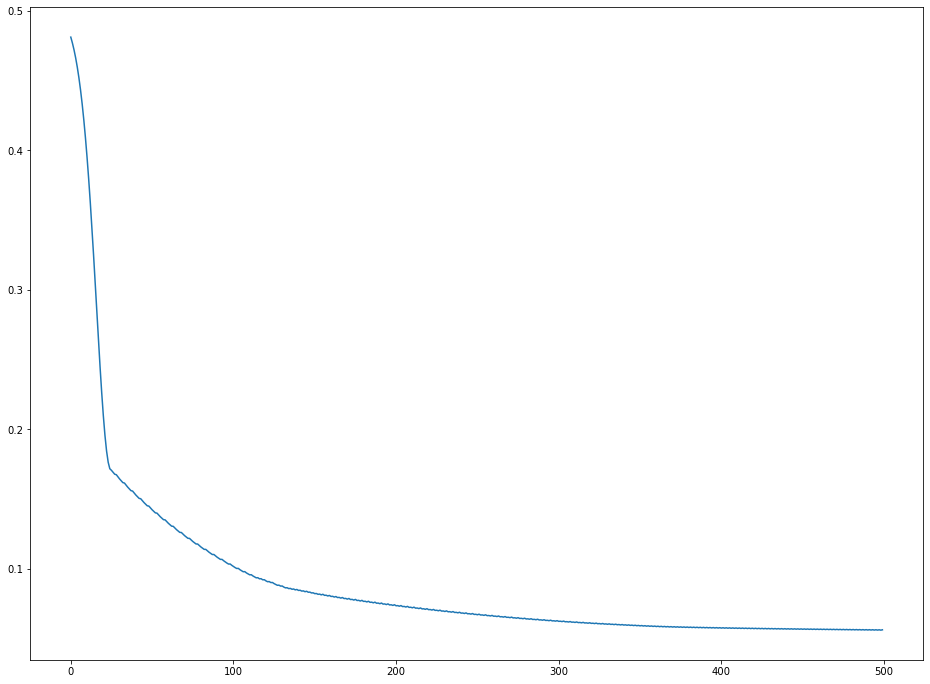

In [270]:
plt.figure(figsize=(16,12))
plt.plot(costs_3)
plt.show()

In [271]:
params_3

array([ 0.23673147, -1.27651756, -2.35452028,  1.44374185,  4.50969643])

In [272]:
E

array([9.46770599e-03, 2.45338441e-03, 1.02376583e-03, 5.49182712e-06,
       1.15498723e-01])

### Оценка качества модели RMSprop


In [277]:
roc_auc_score( Y, preds_3[499] )

0.9918367346938776

In [278]:
# площадь под кривой
average_precision_score( Y, preds_3[499] )

0.9922336164032259

In [279]:
# считаем метрику MSE и R2
rmse = np.sqrt(mean_squared_error(Y, preds_3[499]))
rmse

0.23682930962786639

In [280]:
r2 = r2_score(Y, preds_3[499])
r2

0.7756246192937737

Вывод

Из трёх методов при наименьшем значении функции потерь с меньшим количеством эпох действует RMSprop, что доказывают метрики качества модели.